In [4]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.special import comb

In [47]:
m = np.array(100)
p_vals = np.array([10, 20, 50, 75])
p_vals = p_vals.reshape(-1, 1)

In [48]:
def prob_p_given_m_n(p, m, n):
    num = comb(n-m, (m-p)) * comb(m*np.ones_like(n), p)
    den = comb(n, m*np.ones_like(p))
    return num / den

In [80]:
probs = prob_p_given_m_n(p_vals, m, np.arange(100, 4000))

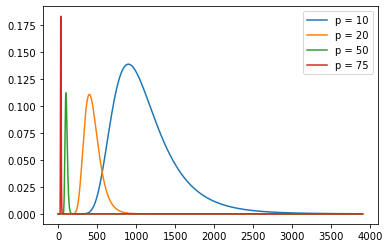

In [81]:
# all plots on the same diagram
n_i = {}
for i in range(probs.shape[0]):
    plt.plot(probs[i], label = "p = " + str(p_vals[i][0]))
    n_i[i] = 100 + np.argmax(probs[i])
plt.legend()
plt.show()

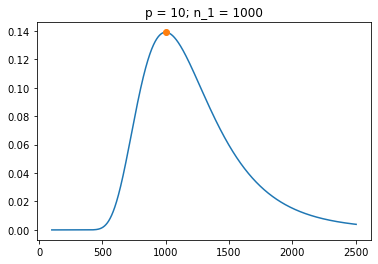

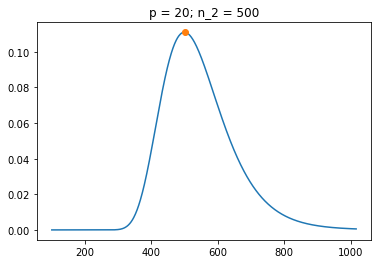

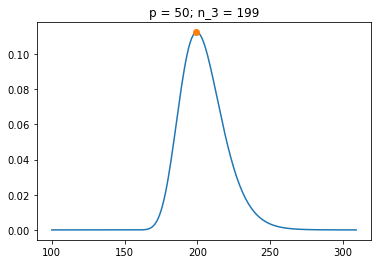

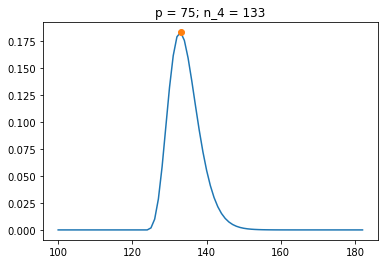

In [82]:
# separate plots:
for i in range(p_vals.shape[0]):
    n_range = np.arange(100, 50000 / (p_vals[i]**1.3))
    probs = prob_p_given_m_n(p_vals[i], m, n_range)
    plt.plot(n_range, probs)
    plt.plot(n_i[i], probs[n_i[i]-100], 'o')
    plt.title("p = " + str(p_vals[i][0]) + "; n_" + str(i+1) + " = " + str(n_i[i]))
    plt.show()

In [84]:
n_i

{0: 1000, 1: 500, 2: 199, 3: 133}

In [106]:
def simulation(m, n_i_s, rep=500):
    num_total = [0]*len(n_i_s)
    for _ in range(rep):
        for i in range(len(n_i_s)):
            n_i = n_i_s[i]
            fishes = np.arange(0, n_i)
            pick1 = np.random.choice(fishes, m, replace=False)
            pick2 = np.random.choice(fishes, m, replace=False)
            num_total[i]+=len(np.intersect1d(pick1, pick2))
    return np.array(num_total).reshape(-1, 1) / rep

In [115]:
result = simulation(m, n_i)
print(p_vals)
print(result)

[[10]
 [20]
 [50]
 [75]]
[[ 9.928]
 [20.27 ]
 [50.384]
 [75.09 ]]
